In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Grab and process the raw data.

data_path = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/sentiments/sentiment labelled sentences/amazon_cells_labelled.csv")
data_path2 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/sentiments/sentiment labelled sentences/imdb_labelled.csv")

df = pd.read_csv(data_path)
df2 = pd.read_csv(data_path2)


In [18]:
keywords = ['nice', 'good', 'winner', 'works great', 'love', 'excellent', 'highly recommended']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    

In [19]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df2[str(key)] = df2.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [20]:
df['allcaps'] = df.message.str.isupper()
df2['allcaps'] = df2.message.str.isupper()


In [21]:
df['sentiment'] = (df['sentiment'] == 1)
df2['sentiment'] = (df2['sentiment'] == 1)

# Note that if you run this cell a second time everything will become false.
# So... Don't.


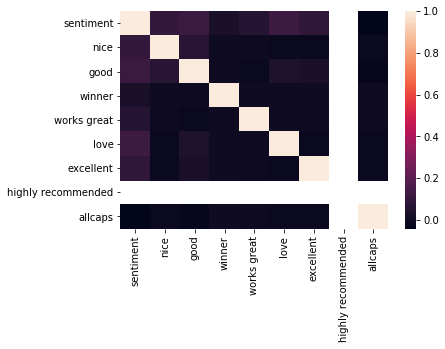

In [22]:
sns.heatmap(df.corr())

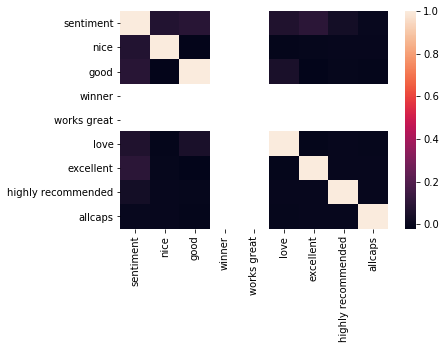

In [23]:
sns.heatmap(df2.corr())

In [24]:
data = df[keywords + ['allcaps']]
target = df['sentiment']

In [25]:
data2 = df2[keywords + ['allcaps']]
target2 = df2['sentiment']

In [26]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 440


In [28]:
# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 1000 points : 457
